# Proyecto de clasificación con uso de Framework
##
#### Importación de librerías

In [13]:
import pandas as pd
import plotly.express as px
import seaborn as sb
import matplotlib.pyplot as plt


#### Importación de Datos

In [2]:
df=pd.read_csv('spotify_songs.csv')

#### Exploración

In [3]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [5]:
df.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

Se buscará hacer un modelo que realice la clasificación de canciones por género de la lista de reproducción en la que se encuentra. Se usarán únicamente valores numéricos para realizar la clasificación, por lo que el resto de las columnas serán eliminadas.

In [6]:
df=df.drop(columns=['track_id','track_name','track_artist','playlist_subgenre','track_album_id','track_album_name','track_album_release_date',
'playlist_name','playlist_id'])
df=df.rename({'playlist_genre':'genre'},axis=1)
df.head()

,track_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [7]:
y=df['genre']
x=df.drop(columns='genre')

In [8]:
x.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [9]:
df = pd.get_dummies(df,columns=['genre'])


In [10]:
df.corr()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock
track_popularity,1.000000,0.064748,-0.109112,-0.000650,0.057687,0.010637,0.006819,0.085159,-0.149872,-0.054584,0.033231,-0.005378,-0.143682,-0.145304,0.078588,0.094654,-0.022337,0.013612,-0.012629
danceability,0.064748,1.000000,-0.086073,0.011736,0.025335,-0.058647,0.181721,-0.024519,-0.008655,-0.123859,0.330523,-0.184084,-0.096879,0.000626,0.173830,-0.048109,0.047040,0.201596,-0.390075
energy,-0.109112,-0.086073,1.000000,0.010052,0.676625,-0.004800,-0.032150,-0.539745,0.033247,0.161223,0.151103,0.149951,0.012611,0.272658,0.023124,0.005977,-0.265001,-0.121978,0.079649
key,-0.000650,0.011736,0.010052,1.000000,0.000959,-0.174093,0.022607,0.004306,0.005968,0.002887,0.019914,-0.013370,0.015139,-0.002936,0.013088,-0.006912,0.003206,0.012302,-0.019301
loudness,0.057687,0.025335,0.676625,0.000959,1.000000,-0.019289,0.010339,-0.361638,-0.147824,0.077613,0.053384,0.093767,-0.115058,0.205345,0.065715,0.060715,-0.170628,-0.049746,-0.122593
mode,0.010637,-0.058647,-0.004800,-0.174093,-0.019289,1.000000,-0.063512,0.009415,-0.006741,-0.005549,0.002614,0.014329,0.015634,-0.043699,-0.003250,0.020332,-0.039754,-0.041169,0.114389
speechiness,0.006819,0.181721,-0.032150,0.022607,0.010339,-0.063512,1.000000,0.026092,-0.103424,0.055426,0.064659,0.044603,-0.089431,-0.095504,-0.018806,-0.146565,0.042730,0.411139,-0.205355
acousticness,0.085159,-0.024519,-0.539745,0.004306,-0.361638,0.009415,0.026092,1.000000,-0.006850,-0.077243,-0.016845,-0.112724,-0.081581,-0.202905,0.069927,-0.009280,0.171425,0.035954,-0.057837
instrumentalness,-0.149872,-0.008655,0.033247,0.005968,-0.147824,-0.006741,-0.103424,-0.006850,1.000000,-0.005507,-0.175402,0.023335,0.063235,0.283471,-0.077565,-0.049794,-0.110842,-0.017973,-0.041965
liveness,-0.054584,-0.123859,0.161223,0.002887,0.077613,-0.005549,0.055426,-0.077243,-0.005507,1.000000,-0.020560,0.021018,0.006138,0.066733,-0.026710,-0.038816,-0.043011,0.004412,0.035387


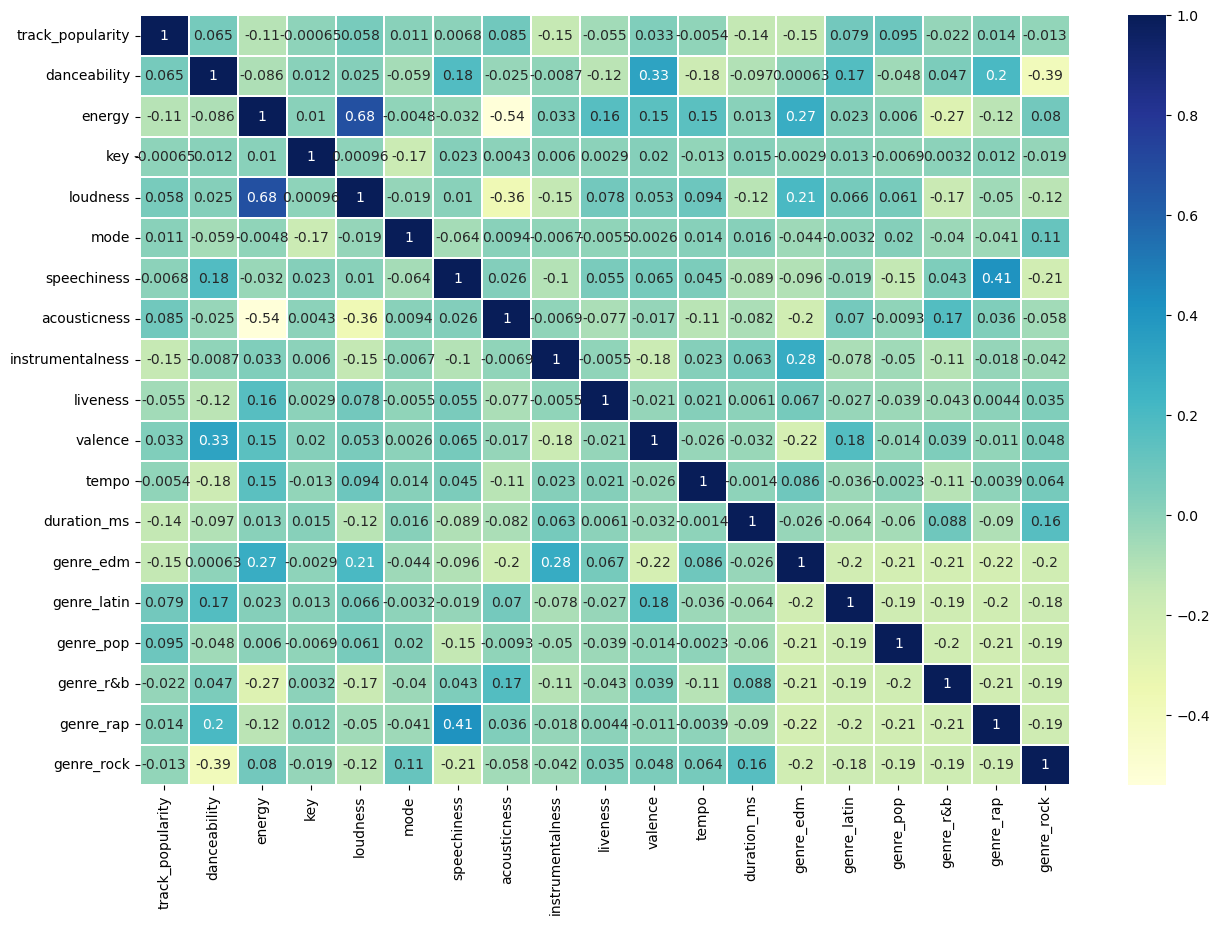

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu",linewidths=.1, annot=True) 

Las correlaciones más fuertes con el género EDM son energía, ruido e instrumentalidad. Con el género latino las correlaciones más fuertes son bailabilidad y positividad. Para el género pop hay un correlación negativa con la cantidad de palabras que se usan. Para el R&B hay una correlación negativa con la energía y ruido, y correlación positiva con la acusticidad. El rap tiene correlación positiva con la bailabilidad y las cantidad de palabras que se dicen. Finalmente el rock tiene una correlación negativa con bailabilidad y cantidad de palabras que se usan, y una corrlación positiva con la duración de la canción.
